In [116]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle;

In [117]:
df = pd.read_csv('sample_new.csv')

In [118]:
df.head()

District_Name  Crop_Year      Season     Crop  Area_Harvested  Production
0      BALIBAGO       2000  Wet Season  Cassava               6      2000.0
1      BALIBAGO       2000  Wet Season  Cassava              17         1.0
2      BALIBAGO       2000  Wet Season    Palay              16       321.0
3      BALIBAGO       2000  Wet Season   Talong               9       641.0
4      BALIBAGO       2000  Wet Season  Kamatis              13       165.0

In [119]:
df.shape

(246091, 6)

In [120]:
df.drop_duplicates(inplace = True)

In [121]:
df.shape

(239060, 6)

In [122]:
df.isna().sum()

District_Name        0
Crop_Year            0
Season               0
Crop                 0
Area_Harvested       0
Production        2979
dtype: int64

In [123]:
df.dtypes

District_Name      object
Crop_Year           int64
Season             object
Crop               object
Area_Harvested      int64
Production        float64
dtype: object

In [124]:
df.drop(['Crop_Year'], axis = 1, inplace = True)
df.drop(['Production'], axis = 1, inplace = True)

In [125]:
df

District_Name      Season     Crop  Area_Harvested
0           BALIBAGO  Wet Season  Cassava               6
1           BALIBAGO  Wet Season  Cassava              17
2           BALIBAGO  Wet Season    Palay              16
3           BALIBAGO  Wet Season   Talong               9
4           BALIBAGO  Wet Season  Kamatis              13
...              ...         ...      ...             ...
246086        BAGBAG  Dry Season    Palay              20
246087        BAGBAG  Dry Season    Palay              18
246088        BAGBAG  Dry Season  Patatas               4
246089        BAGBAG  Dry Season    Palay               4
246090        BAGBAG  Dry Season    Palay               6

[239060 rows x 4 columns]

<AxesSubplot:>

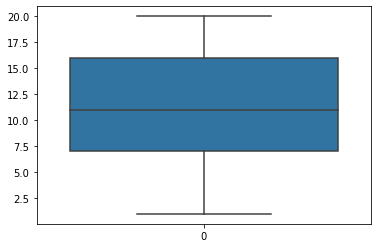

In [126]:
sns.boxplot(df['Area_Harvested'])

In [127]:
df['Area_Harvested']

0          6
1         17
2         16
3          9
4         13
          ..
246086    20
246087    18
246088     4
246089     4
246090     6
Name: Area_Harvested, Length: 239060, dtype: int64

In [128]:
df['Crop'].unique()

array(['Cassava', 'Palay', 'Talong', 'Kamatis', 'Talong ', 'Patatas',
       'Mais', 'Ampalaya'], dtype=object)

In [129]:
df['Season'].unique()

array(['Wet Season', 'Dry Season'], dtype=object)

In [130]:
df['District_Name'].unique()

array(['BALIBAGO', 'BUNGAHAN', 'CALACA', 'CUACO', 'GINTONG PAGASA',
       'LAGULUAN', 'LUMANG TUBIGAN', 'LUYAHAN', 'MALARUHATAN',
       'MATABUNGKAY', 'MOLINO', 'PRENZA', 'TAN-AG', 'BAGBAG'],
      dtype=object)

In [131]:
df

District_Name      Season     Crop  Area_Harvested
0           BALIBAGO  Wet Season  Cassava               6
1           BALIBAGO  Wet Season  Cassava              17
2           BALIBAGO  Wet Season    Palay              16
3           BALIBAGO  Wet Season   Talong               9
4           BALIBAGO  Wet Season  Kamatis              13
...              ...         ...      ...             ...
246086        BAGBAG  Dry Season    Palay              20
246087        BAGBAG  Dry Season    Palay              18
246088        BAGBAG  Dry Season  Patatas               4
246089        BAGBAG  Dry Season    Palay               4
246090        BAGBAG  Dry Season    Palay               6

[239060 rows x 4 columns]

## Converting categorical features into numerical features

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
encoder = LabelEncoder();
df_new = df.copy();

In [134]:
encoderSeason = encoder.fit(df_new['Season'])

In [135]:
# import pickle
with open('encoderSeason.pkl', 'wb') as f:
    pickle.dump(encoderSeason, f)

In [137]:
with open('encoderSeason.pkl', 'rb') as f:
    season_loaded = pickle.load(f)

In [138]:
season_loaded.transform(['Wet Season'])

array([1])

In [139]:
encoderCrop  = encoder.fit(df_new['Crop'])

In [140]:
# import pickle
with open('encoderCrop.pkl', 'wb') as f:
    pickle.dump(encoderCrop, f)

In [141]:
with open('encoderCrop.pkl', 'rb') as f:
    crop_loaded = pickle.load(f)

In [142]:
crop_loaded.transform(['Palay'])

array([4])

In [143]:
encoderDistrict = encoder.fit(df_new['District_Name'])

In [144]:
# import pickle
with open('encoderDistrict.pkl', 'wb') as f:
    pickle.dump(encoderDistrict, f)

In [145]:
with open('encoderDistrict.pkl', 'rb') as f:
    district_loaded = pickle.load(f)

In [146]:
district_loaded.transform(['BALIBAGO'])

array([1])

In [147]:
df_new['District_Name'] = encoder.fit_transform(df_new['District_Name'])

In [148]:
df_new['Crop'] = encoder.fit_transform(df_new['Crop'])

In [149]:
df_new['Season'] = encoder.fit_transform(df_new['Season'])

In [150]:
df_new['District_Name'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0])

In [151]:
df_new['Crop'].unique()

array([1, 4, 6, 2, 7, 5, 3, 0])

In [152]:
df_new['Season'].unique()

array([1, 0])

In [153]:
df_new['Season'].value_counts()

Season
0    120842
1    118218
Name: count, dtype: int64

In [154]:
df_new.head(5)

District_Name  Season  Crop  Area_Harvested
0              1       1     1               6
1              1       1     1              17
2              1       1     4              16
3              1       1     6               9
4              1       1     2              13

In [155]:
df_new.dtypes

District_Name     int32
Season            int32
Crop              int32
Area_Harvested    int64
dtype: object

### Scaler

In [156]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy()
scaler = MinMaxScaler()

for col in df_scaled.columns:
    if (col != 'Season'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [157]:
df_scaled

District_Name  Season      Crop  Area_Harvested
0            0.076923       1  0.142857        0.263158
1            0.076923       1  0.142857        0.842105
2            0.076923       1  0.571429        0.789474
3            0.076923       1  0.857143        0.421053
4            0.076923       1  0.285714        0.631579
...               ...     ...       ...             ...
246086       0.000000       0  0.571429        1.000000
246087       0.000000       0  0.571429        0.894737
246088       0.000000       0  0.714286        0.157895
246089       0.000000       0  0.571429        0.157895
246090       0.000000       0  0.571429        0.263158

[239060 rows x 4 columns]

<AxesSubplot:>

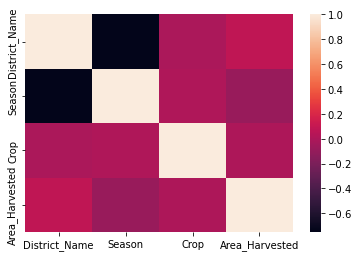

In [158]:
sns.heatmap(df_scaled.corr())

In [159]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

corr_df

Empty DataFrame
Columns: [0]
Index: []

### Modelling

In [160]:
from sklearn.model_selection import train_test_split

X = df_new.drop(['Season'], axis =1)
y = df_new['Season']

In [161]:
from sklearn.model_selection import train_test_split;

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,train_size=.8);

print(X_train.shape)
print(X_test.shape)

(191248, 3)
(47812, 3)


In [162]:
from sklearn.metrics import confusion_matrix;

from sklearn.metrics import classification_report;

def evaluate_model(model):
    print("Confusion matrix: \n",confusion_matrix(y_test, model.predict(X_test)))
    print('Training score: ', model.score(X_train,y_train))
    print('Testing score: ', model.score(X_test,y_test))


In [163]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

evaluate_model(gnb)

Confusion matrix: 
 [[22550  1618]
 [ 2581 21063]]
Training score:  0.9091702919769096
Testing score:  0.9121768593658496


In [164]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train,y_train)

evaluate_model(bnb)

Confusion matrix: 
 [[ 1592 22576]
 [    0 23644]]
Training score:  0.5284499707186481
Testing score:  0.5278172843637581


In [165]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

evaluate_model(dt)

Confusion matrix: 
 [[24004   164]
 [    0 23644]]
Training score:  0.9968261105998494
Testing score:  0.9965698987701832


In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

evaluate_model(rf)

Confusion matrix: 
 [[24004   164]
 [    0 23644]]
Training score:  0.9968261105998494
Testing score:  0.9965698987701832


In [167]:
from sklearn.neighbors import KNeighborsClassifier;

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

evaluate_model(knn)

Confusion matrix: 
 [[24004   164]
 [    0 23644]]
Training score:  0.9968261105998494
Testing score:  0.9965698987701832


In [168]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

evaluate_model(lr)

Confusion matrix: 
 [[22495  1673]
 [ 1688 21956]]
Training score:  0.9282240860035138
Testing score:  0.9297038400401573


### Hyperparameter tuning

In [169]:
from sklearn.model_selection import RandomizedSearchCV

### 4.1.1. Decision Tree Classifier Hyperparameter Tuning

In [170]:
params = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, 
            n_iter = 15, cv=10)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [171]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 5, 'criterion': 'gini'}

In [172]:
dt_tuned = DecisionTreeClassifier(
    splitter='random',
    max_depth=15,
    criterion='gini'
);
dt_tuned.fit(X_train,y_train)
evaluate_model(dt_tuned)

Confusion matrix: 
 [[24004   164]
 [    0 23644]]
Training score:  0.9968261105998494
Testing score:  0.9965698987701832


### 4.1.1. Random Forest Classifier Hyperparameter Tuning

In [173]:
params = {
    "max_depth": [5,10,15,20],
    "criterion": ['gini','entropy'],
    "n_estimators": [5,10,20,100]
}

rsearch = RandomizedSearchCV(RandomForestClassifier(), params, 
            n_iter = 15, cv=10)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [5, 10, 20, 100]})

In [174]:
rsearch.best_params_

{'n_estimators': 20, 'max_depth': 5, 'criterion': 'entropy'}

In [175]:
rf_tuned = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 10,
    criterion = 'entropy')

rf_tuned.fit(X_train,y_train)
evaluate_model(rf_tuned)

Confusion matrix: 
 [[24004   164]
 [    0 23644]]
Training score:  0.9968261105998494
Testing score:  0.9965698987701832


In [176]:
params = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
rsearch = RandomizedSearchCV(KNeighborsClassifier(), params, 
            n_iter = 15, cv=10)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=15,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [177]:
rsearch.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 3}

In [178]:
knn_tuned = KNeighborsClassifier(
    n_neighbors = 18,
    weights = 'distance',
    p = 1)

knn_tuned.fit(X_train,y_train)
evaluate_model(knn_tuned)

Confusion matrix: 
 [[24004   164]
 [    0 23644]]
Training score:  0.9968261105998494
Testing score:  0.9965698987701832


## prediction

## KNN

In [179]:
with open('capsmodel.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [180]:
with open('capsmodel.pkl', 'rb') as f:
    modelKNN = pickle.load(f)

In [181]:
print(modelKNN)

KNeighborsClassifier()


In [182]:
season_loaded.transform(['Wet Season'])

array([1])

In [183]:
with open('encoderDistrict.pkl', 'rb') as f:
    district_loaded = pickle.load(f)

In [184]:
dist = district_loaded.transform(['LUMANG TUBIGAN'])
print(dist)

[7]


In [185]:
with open('encoderCrop.pkl', 'rb') as f:
    crop_loaded = pickle.load(f)

In [186]:
crop = crop_loaded.transform(['Ampalaya'])
print(crop)

[0]


In [187]:
area = 15

In [188]:
params = [[float(dist), float(crop), float(area)]]
pred = modelKNN.predict(params)
print(pred)

[1]


## Decison Tree

In [189]:
with open('dtmodel.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [190]:
with open('dtmodel.pkl', 'rb') as f:
    model = pickle.load(f)

In [191]:
print(model)

DecisionTreeClassifier()


In [192]:
dist = district_loaded.transform(['LAGULUAN'])
print(dist)

[6]


In [193]:
crop = crop_loaded.transform(['Kamatis'])
print(crop)

[2]


In [194]:
area = 7

In [195]:
params = [[float(dist), float(crop), float(area)]]
pred = model.predict(params)
print(pred)

[1]
